In [1]:
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.utils import simple_preprocess
from sklearn.manifold import TSNE
import pandas as pd
import numpy 

from sklearn.cluster import KMeans
import re

In [2]:
import matplotlib.pyplot as plt

- Gensim Features / Functions 
- Word2vec (Pre-trained Model, Self-trained Model, Vector Concept, Cosine Similarity, Visualization) 
- Doc2vec (BBC News) 
- TextRank (BBC News) 

#### Gensim Basics

In [3]:
# Definintion of document in Gensim 

document = 'I love machine learning'

# Definition of corpus in Gensim 

corpus = ["Human machine interface for lab abc computer applications",
          "A survey of user opinion of computer system response time",
          "The EPS user interface management system",
          "System and human system engineering testing of EPS",
          "Relation of user perceived response time to error measurement",
          "The generation of random binary unordered trees",
          "The intersection graph of paths in trees",
          "Graph minors IV Widths of trees and well quasi ordering",
          "Graph minors A survey"]

In [4]:
texts = [[text for text in doc.split()] for doc in corpus]
dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(45 unique tokens: ['Human', 'abc', 'applications', 'computer', 'for']...)


In [5]:
print(dictionary.token2id)

{'Human': 0, 'abc': 1, 'applications': 2, 'computer': 3, 'for': 4, 'interface': 5, 'lab': 6, 'machine': 7, 'A': 8, 'of': 9, 'opinion': 10, 'response': 11, 'survey': 12, 'system': 13, 'time': 14, 'user': 15, 'EPS': 16, 'The': 17, 'management': 18, 'System': 19, 'and': 20, 'engineering': 21, 'human': 22, 'testing': 23, 'Relation': 24, 'error': 25, 'measurement': 26, 'perceived': 27, 'to': 28, 'binary': 29, 'generation': 30, 'random': 31, 'trees': 32, 'unordered': 33, 'graph': 34, 'in': 35, 'intersection': 36, 'paths': 37, 'Graph': 38, 'IV': 39, 'Widths': 40, 'minors': 41, 'ordering': 42, 'quasi': 43, 'well': 44}


In [6]:
# Another Example with simple_process 

docs = ["Who let the dogs out?",
        "Who? Who? Who? Who?"]
text = [[text for text in doc.split()] for doc in docs]
text

[['Who', 'let', 'the', 'dogs', 'out?'], ['Who?', 'Who?', 'Who?', 'Who?']]

In [7]:
tokenized_list = [simple_preprocess(doc) for doc in docs]
tokenized_list

[['who', 'let', 'the', 'dogs', 'out'], ['who', 'who', 'who', 'who']]

In [8]:
print(corpora.Dictionary(tokenized_list).token2id)

{'dogs': 0, 'let': 1, 'out': 2, 'the': 3, 'who': 4}


In [9]:
# Dictionary to Bag of Words

mydict = corpora.Dictionary()
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list]
mycorpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(4, 4)]]

#### Word2Vec Demo

In [10]:
from gensim.models import Word2Vec

In [12]:
# Using the questions dataset

demo_data = pd.read_csv('train.csv', index_col=0)
demo_data.head()

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [13]:
print(demo_data.loc[2, 'question1'])
print(gensim.utils.simple_preprocess(str(demo_data.loc[2, 'question1']).encode('utf-8')))

How can I increase the speed of my internet connection while using a VPN?
['how', 'can', 'increase', 'the', 'speed', 'of', 'my', 'internet', 'connection', 'while', 'using', 'vpn']


In [14]:
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents = []
for index, row in demo_data.iterrows():
    documents.append(read_questions(row,"question1"))
    if row["is_duplicate"] == 0:
        documents.append(read_questions(row,"question2"))

In [15]:
print("List of lists. Let's confirm: ", type(documents), " of ", type(documents[0]))

List of lists. Let's confirm:  <class 'list'>  of  <class 'list'>


In [16]:
model = gensim.models.Word2Vec(size=50, window=8, min_count=2, sg=1, workers=10)
model.build_vocab(documents)  # prepare the model vocabulary

Below I provide the definition of four parameters that we used to define a Word2Vec model:

* **size:** The size means the dimensionality of word vectors. It defines the number of tokens used to represent each word. For example, rake a look at the picture above. The size would be equal to 4 in this example. Each input word would be represented by 4 tokens: King, Queen, Women, Princess.  Rule-of-thumb: If a dataset is small, then size should be small too. If a dataset is large, then size should be greater too. It's the question of tuning.

* **window:** The maximum distance between the target word and its neighboring word. For example, let's take the phrase "agama is a reptile " with 4 words (suppose that we do not exclude the stop words). If window size is 2, then the vector of word "agama" is directly affected by the word "is" and "a". Rule-of-thumb: a smaller window should provide terms that are more related (of course, the exclusion of stop words should be considered).

* **min_count:** Ignores all words with total frequency lower than this. For example, if the word frequency is extremally low, then this word might be considered as unimportant.

* **sg:** Selects training algorithm: 1 for Skip-Gram; 0 for CBOW (Continuous Bag of Words).

* **workers:** The number of worker threads used to train the model.

More details about input parameters can be found [here](http://radimrehurek.com/gensim/models/word2vec.html).

In [17]:
model.train(sentences=documents, total_examples=len(documents), epochs=10)

(50925967, 70289020)

In [18]:
word_vectors = model.wv
len(word_vectors.vocab)

47336

In [19]:
# Example of word vector 
model.wv['cat']

array([-0.23983778,  0.18637186, -0.22112775,  0.8846755 , -0.41757   ,
       -0.03536042, -0.20003209, -0.17818587, -0.6505629 , -0.05696494,
       -0.00613836, -0.23572783,  0.00458899, -0.14232433,  0.42285526,
        0.6029319 ,  0.9357215 , -0.7923746 ,  0.5324661 , -0.678615  ,
        0.55811495,  0.08296257,  0.48321727, -0.01526136,  0.40693516,
       -0.11053187,  0.12342496,  0.7715599 ,  0.23937933, -0.08773161,
       -0.18359725,  0.32641262, -0.03723953, -0.01392873,  0.39113712,
        0.3235801 , -0.1194763 , -0.24060437, -0.9005812 ,  0.50236213,
        1.7229913 ,  0.06261408,  0.0083284 ,  1.0984223 ,  0.13561478,
       -0.06405158, -0.47531947,  0.08770402, -0.278839  ,  0.06807523],
      dtype=float32)

In [20]:
w1 = "trump"
model.wv.most_similar(w1, topn=5)

[('donald', 0.9904582500457764),
 ('hillary', 0.8984320163726807),
 ('clinton', 0.889200747013092),
 ('presidency', 0.8815059065818787),
 ('elect', 0.8571491837501526)]

In [21]:
w1 = "iphone"
model.wv.most_similar(w1, topn=5)

[('ipad', 0.9093571901321411),
 ('phone', 0.8385956287384033),
 ('nexus', 0.8380030989646912),
 ('samsung', 0.8283494114875793),
 ('facetime', 0.8244905471801758)]

In [23]:
model.wv.doesnt_match(["facebook","tesla","amazon", "google", "airbnb"])

'tesla'

In [24]:
# Lets get some vocabs

wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<500:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab

{'what': <gensim.models.keyedvectors.Vocab at 0x1f33239abc8>,
 'is': <gensim.models.keyedvectors.Vocab at 0x1f332557848>,
 'the': <gensim.models.keyedvectors.Vocab at 0x1f35ef98548>,
 'step': <gensim.models.keyedvectors.Vocab at 0x1f35ef98608>,
 'by': <gensim.models.keyedvectors.Vocab at 0x1f35ef98788>,
 'guide': <gensim.models.keyedvectors.Vocab at 0x1f35ef98808>,
 'to': <gensim.models.keyedvectors.Vocab at 0x1f35ef98848>,
 'invest': <gensim.models.keyedvectors.Vocab at 0x1f35ef98888>,
 'in': <gensim.models.keyedvectors.Vocab at 0x1f35ef98708>,
 'share': <gensim.models.keyedvectors.Vocab at 0x1f35ef987c8>,
 'market': <gensim.models.keyedvectors.Vocab at 0x1f35ef988c8>,
 'india': <gensim.models.keyedvectors.Vocab at 0x1f35ef98908>,
 'story': <gensim.models.keyedvectors.Vocab at 0x1f35ef98948>,
 'of': <gensim.models.keyedvectors.Vocab at 0x1f35ef98988>,
 'kohinoor': <gensim.models.keyedvectors.Vocab at 0x1f35ef989c8>,
 'koh': <gensim.models.keyedvectors.Vocab at 0x1f35ef98a08>,
 'noor':

In [25]:
X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

C:\Users\erict\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


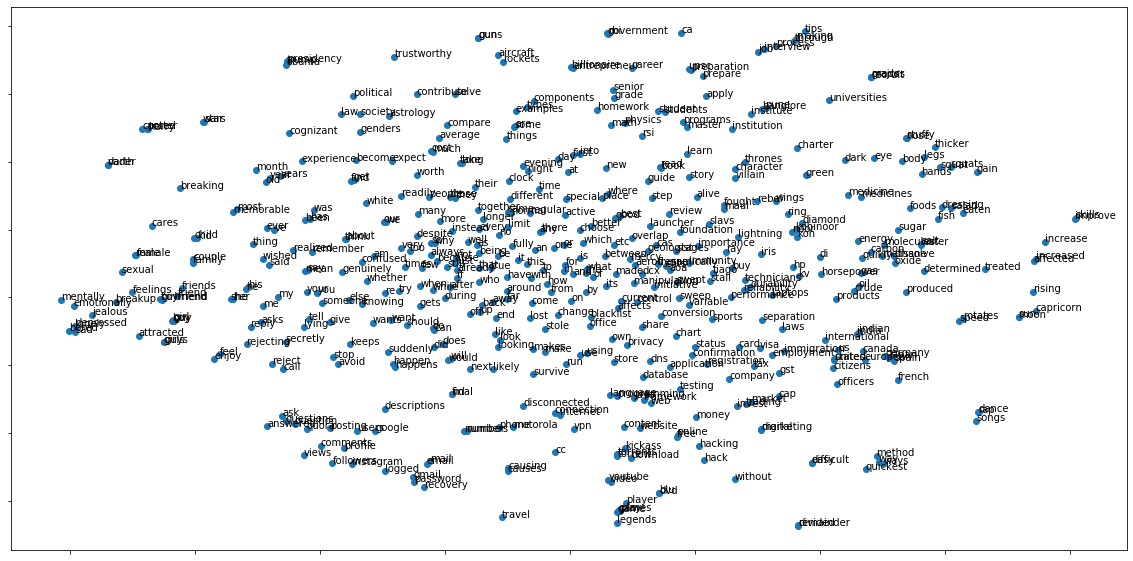

In [26]:
#Plot the t-SNE output
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
plt.show()

In [ ]:
# X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
# tsne_model = TSNE(perplexity=40, n_components=3, init="pca", n_iter=5000, random_state=23)
# Y = tsne_model.fit_transform(X)

# import plotly.graph_objects as go

# fig = go.Figure()

# for i, word in enumerate(words):
#     fig = fig.add_trace(go.Scatter3d(x=Y[:,0], y=Y[:,1], z=Y[:,2], mode='markers', text=str(word), name=str(word)))
# fig.show()

In [33]:
# Applying k-means clustering

kmeans = KMeans(n_clusters=40, random_state=0).fit(model.wv[wanted_vocab])

final_df = pd.DataFrame(list(zip(words, kmeans.labels_)), columns=['word', 'cluster'])
final_df[final_df['cluster'] == 18]

,word,cluster
85,video,18
115,youtube,18
116,comments,18
258,views,18
264,website,18
351,instagram,18
352,followers,18
365,profile,18
427,songs,18
446,content,18


#### Doc2Vec Demo 

In [35]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [38]:
imdb = pd.read_csv('tmdb_5000_movies.csv')
imdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [39]:
overview_list = []

for index, row in imdb.iterrows():
    overview_list.append(gensim.utils.simple_preprocess(str(row['overview']).encode('utf-8')))

In [40]:
tagged_data = [TaggedDocument(words=overview, 
               tags=[str(movie_id)]) for movie_id, overview in zip(imdb['id'].tolist(), overview_list)]
tagged_data[1]

TaggedDocument(words=['captain', 'barbossa', 'long', 'believed', 'to', 'be', 'dead', 'has', 'come', 'back', 'to', 'life', 'and', 'is', 'headed', 'to', 'the', 'edge', 'of', 'the', 'earth', 'with', 'will', 'turner', 'and', 'elizabeth', 'swann', 'but', 'nothing', 'is', 'quite', 'as', 'it', 'seems'], tags=['285'])

In [46]:
model = Doc2Vec(size = 150,
                window = 20,
                alpha = 0.05, 
                min_alpha = 0.0025,
                dm = 0,
                dbow_words = 1,
                seed = 0, 
                negative = 3)

model.build_vocab(tagged_data)

for epoch in range(10):
    print('Epochs iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    model.alpha -= 0.0002

model.min_alpha = model.alpha

C:\Users\erict\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
C:\Users\erict\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  app.launch_new_instance()


Epochs iteration 0
Epochs iteration 1
Epochs iteration 2
Epochs iteration 3
Epochs iteration 4
Epochs iteration 5
Epochs iteration 6
Epochs iteration 7
Epochs iteration 8
Epochs iteration 9


In [47]:
model.docvecs.most_similar(285)

[('193893', 0.48690399527549744),
 ('11892', 0.4373805522918701),
 ('18065', 0.4195709526538849),
 ('46503', 0.4182800054550171),
 ('13389', 0.41819214820861816),
 ('9490', 0.4163379371166229),
 ('41479', 0.4147717356681824),
 ('42807', 0.40975266695022583),
 ('11282', 0.4079587459564209),
 ('8321', 0.40243133902549744)]

In [48]:
id_list = []
sim_list = model.docvecs.most_similar('49026', topn=10)
for i in range(len(sim_list)):
    id_list.append(sim_list[i][0])
imdb[imdb['id'].isin(id_list)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002
119,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www2.warnerbros.com/batmanbegins/index....,272,"[{""id"": 486, ""name"": ""himalaya""}, {""id"": 779, ...",en,Batman Begins,"Driven by tragedy, billionaire Bruce Wayne ded...",115.040024,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2005-06-10,374218673,140.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Evil fears the knight.,Batman Begins,7.5,7359
210,125000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,415,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman & Robin,Along with crime-fighting partner Robin and ne...,50.073575,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1997-06-20,238207122,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Strength. Courage. Honor. And loyalty.,Batman & Robin,4.2,1418
299,100000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,414,"[{""id"": 483, ""name"": ""riddle""}, {""id"": 849, ""n...",en,Batman Forever,The Dark Knight of Gotham City confronts a das...,48.205606,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1995-05-31,336529144,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Courage now, truth always...",Batman Forever,5.2,1498
884,40000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",http://www.zerodarkthirty-movie.com/site/,97630,"[{""id"": 441, ""name"": ""assassination""}, {""id"": ...",en,Zero Dark Thirty,A chronicle of the decade-long hunt for al-Qae...,38.306954,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-12-19,132820716,157.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Greatest Manhunt in History,Zero Dark Thirty,6.7,1702
968,50000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,11892,"[{""id"": 703, ""name"": ""detective""}, {""id"": 1328...",en,Murder by Numbers,Tenacious homicide detective Cassie Mayweather...,16.167093,"[{""name"": ""Castle Rock Entertainment"", ""id"": 9...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-04-19,56714147,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The only flaw in their plan was her.,Murder by Numbers,6.0,268
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",NaN,268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096
1449,35000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 14, ""name...",NaN,9616,"[{""id"": 483, ""name"": ""riddle""}, {""id"": 588, ""n...",en,The Order,"For centuries, a secret Order of priests has e...",3.746806,"[{""name""

#### TextRank Demo

In [49]:
from gensim.summarization.keywords import get_graph
from gensim.summarization import keywords
from gensim.summarization.textcleaner import split_sentences
import gensim

In [58]:
def summary(text):
    print('Original Text: \n')
    print(text)
    for ratio in [0.2, 0.3]:
        summarized_content = gensim.summarization.summarize(text, ratio=ratio)
        print()
        print('-----> Summarized Content (Ratio is %.1f):' %ratio)
        print(summarized_content)

In [59]:
f = open('demo.txt', 'r', encoding='utf8')
txt = f.read()
f.close()

In [60]:
txt_list = split_sentences(txt)
news = ' '.join(txt_list)
summary(news)

Original Text: 

HSBC said on Sunday that it will provide more than HK$30 billion (US$3.9 billion) in additional liquidity relief to Hong Kong businesses pressured by the effects of the coronavirus outbreak on the city’s economy. The bank, one of three lenders authorised to issue currency in the city, said it would now allow taxi and public light bus operators to make interest-only payments for six months and borrowers of property-secured commercial loans to do so for up to one year if they apply by June 30. HSBC had been providing similar relief to small and medium-sized enterprise customers since September under two government loan schemes set up following months of street protests in Hong Kong. Trade finance customers will be able to apply to convert part of their loan facility into an overdraft facility worth up to HK$10 million for six months to help with payroll and other operational needs. The bank is also extending import trade loans set to mature between February 10 and the en